In [183]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [56]:
data = pd.read_csv("train (3).csv")
data.describe(include='all')

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
count,7905.000000,7905.000000,7905,7905.000000,7905,7905,7905,7905,7905,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905
unique,NaN,NaN,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Placebo,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,NaN,4010,NaN,7336,7525,4042,5966,7161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4965
mean,3952.000000,2030.173308,NaN,18373.146490,NaN,NaN,NaN,NaN,NaN,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511,NaN
std,2282.121272,1094.233744,NaN,3679.958739,NaN,NaN,NaN,NaN,NaN,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511,NaN
min,0.000000,41.000000,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,NaN
25%,1976.000000,1230.000000,NaN,15574.000000,NaN,NaN,NaN,NaN,NaN,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000,NaN
50%,3952.000000,1831.000000,NaN,18713.000000,NaN,NaN,NaN,NaN,NaN,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000,NaN
75%,5928.000000,2689.000000,NaN,20684.000000,NaN,NaN,NaN,NaN,NaN,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000,NaN


In [57]:
train_data, validation_data = train_test_split(data,test_size=0.1,shuffle=True)
train_data.describe(include='all')

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
count,7114.000000,7114.000000,7114,7114.000000,7114,7114,7114,7114,7114,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114
unique,NaN,NaN,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Placebo,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,NaN,3607,NaN,6608,6769,3635,5366,6444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4479
mean,3953.019820,2031.031347,NaN,18364.752882,NaN,NaN,NaN,NaN,NaN,2.589809,351.043576,3.547248,83.717740,1823.929013,114.633942,115.263987,265.814029,10.627200,3.030925,NaN
std,2281.372974,1094.067672,NaN,3685.594316,NaN,NaN,NaN,NaN,NaN,3.820168,195.624480,0.345589,75.770706,1920.994201,48.674799,52.419568,87.374189,0.774497,0.866386,NaN
min,0.000000,41.000000,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,NaN
25%,1981.250000,1230.000000,NaN,15574.000000,NaN,NaN,NaN,NaN,NaN,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,212.000000,10.000000,2.000000,NaN
50%,3953.000000,1831.000000,NaN,18701.000000,NaN,NaN,NaN,NaN,NaN,1.100000,298.000000,3.580000,63.000000,1174.000000,108.500000,104.000000,265.000000,10.600000,3.000000,NaN
75%,5925.750000,2689.000000,NaN,20684.000000,NaN,NaN,NaN,NaN,NaN,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,317.750000,11.000000,4.000000,NaN


(array([3527., 2165.,  771.,  352.,  159.,    4.,   73.,   40.,    0.,
          23.]),
 array([  4. ,  62.4, 120.8, 179.2, 237.6, 296. , 354.4, 412.8, 471.2,
        529.6, 588. ]),
 <BarContainer object of 10 artists>)

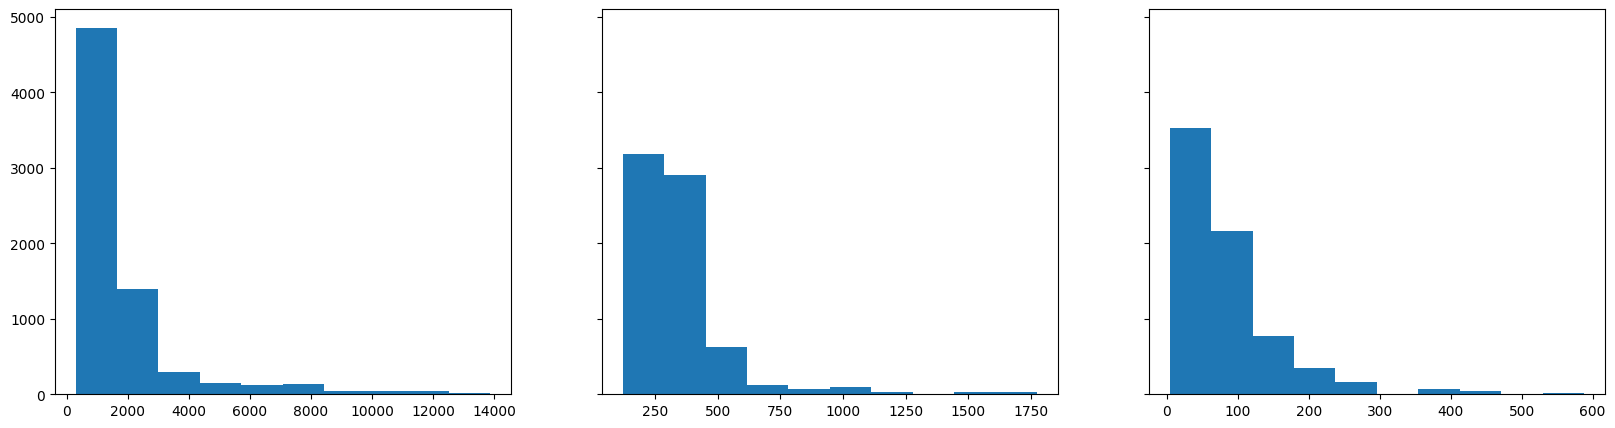

In [58]:
f, (ax0, ax1, ax2) = plt.subplots(1,3,sharey=True,figsize=(20,5))

ax0.hist(train_data['Alk_Phos'])
ax1.hist(train_data['Cholesterol'])
ax2.hist(train_data['Copper'])

In [225]:

CAT_COL = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
NUM_COL = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
x0='Ascites'
x1='Hepatomegaly'
TRAIN_LIST = [x0,x1]


In [226]:
target = train_data['Status'].map({'D':0, 'C':1, 'CL':2})

In [227]:
OHE = OneHotEncoder()
scaled_cat_train_data = OHE.fit_transform(train_data[TRAIN_LIST])

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaled_num_train_data = scaler.fit_transform(train_data[TRAIN_LIST])

In [229]:
model = KMeans(3)
model.fit(scaled_cat_train_data)
model.inertia_

c:\Users\hussam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


51.61138258120238

In [230]:
predicted = (model.predict(scaled_cat_train_data))
train_data['prdicted'] = predicted

Predicted


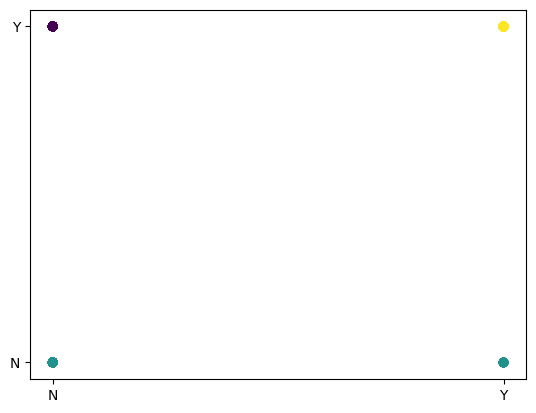

In [231]:
f = plt.scatter(train_data[x0], train_data[x1],c=train_data['prdicted'])
print('Predicted')

target


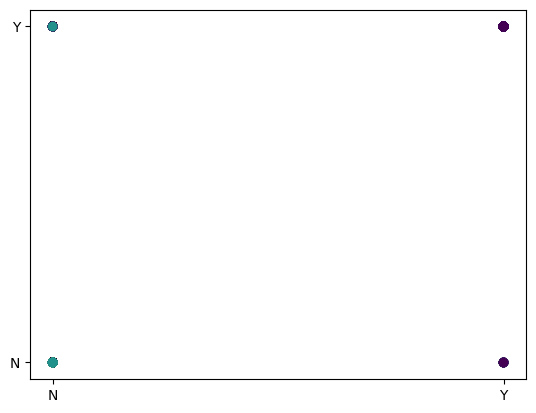

In [232]:
plt.scatter(train_data[x0], train_data[x1], c=train_data['Status'].map({'D':0, 'C':1, 'CL':2}))
print("target")

In [245]:
print(target, train_data['prdicted'])

567     1
2279    1
2289    0
1291    0
4348    1
       ..
4456    1
7165    0
6915    1
1581    1
3416    1
Name: Status, Length: 7114, dtype: int64 567     1
2279    1
2289    1
1291    0
4348    1
       ..
4456    1
7165    0
6915    1
1581    0
3416    1
Name: prdicted, Length: 7114, dtype: int32
